# Coding Task 2

- Deadline (upload to Ilias): 2023-05-14 24:00
- Solutions in lecture on 2023-05-17
- Estimated effort: from 4 to 60 hours
- Images (data) on Ilias in the Data folder, the images.zip file
- Main notebook is number 11 for this task, however, also others may help you. You can also benefit a lot from googeling for code examples

## Subtasks (maximum 12.5 points)


- Upload the images to a folder on your google drive. Write a function which retrieves the filenames of the images, contains a loop converting them to png images and saves them. [about 1 hour] [max 3 points]

### Task 1
Images were uploaded to github and then converted in git.

In [6]:
#Modules used
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io
# from skimage.external.tifffile import TiffFile
import skimage.filters as skf
import skimage.morphology as skm
from PIL import Image
import os 

from heic2png import HEIC2PNG

In [13]:
img_folder_path = "image/"
img_folder = os.listdir(img_folder_path)

for file in os.listdir(img_folder_path):
    heic_img_path = os.path.join(img_folder_path, file)
    png_file_path = "image_png/" + file[:-4] + "png"
    
    try:
        # Convert HEIC to PNG
        heic_img = HEIC2PNG(heic_img_path)
        
        # Save the PNG file
        heic_img.save(png_file_path)
        print(f"Converted {file} to PNG successfully.")
    except Exception as e:
        # Log the error or handle it as needed
        print(f"Error converting {file}: {e}. Skipping...")

Error converting IMG_5379.HEIC: The file image_png\IMG_5379.png already exists.. Skipping...
Converted IMG_5380.HEIC to PNG successfully.
Converted IMG_5381.HEIC to PNG successfully.
Converted IMG_5382.HEIC to PNG successfully.
Converted IMG_5383.HEIC to PNG successfully.
Converted IMG_5384.HEIC to PNG successfully.
Converted IMG_5385.HEIC to PNG successfully.
Converted IMG_5386.HEIC to PNG successfully.
Converted IMG_5387.HEIC to PNG successfully.
Converted IMG_5388.HEIC to PNG successfully.
Converted IMG_5389.HEIC to PNG successfully.
Converted IMG_5390.HEIC to PNG successfully.
Converted IMG_5391.HEIC to PNG successfully.
Converted IMG_5392.HEIC to PNG successfully.
Converted IMG_5393.HEIC to PNG successfully.


### Task 2
- With some filtering and sthresholding, write a function which converts the colored bins into nice white segments on a black background for one image. [about 1 hour][max 3 points]

In [19]:
import cv2
import scipy

In [64]:
def image_input(path):
    imageRGB  = io.imread(path)
    image = imageRGB[:,:,2] #take gray color
    image = image[image.shape[0]//2:image.shape[0],:] #adjusting image
    return image

In [72]:
def create_binary(image, Lower = 70, Upper = 255):
    wellplate_f = scipy.ndimage.gaussian_filter(image,sigma=10) #blur image 
    thresh = cv2.threshold(wellplate_f,Lower, Upper, cv2.THRESH_BINARY_INV)[1]
    return thresh

Example usage:

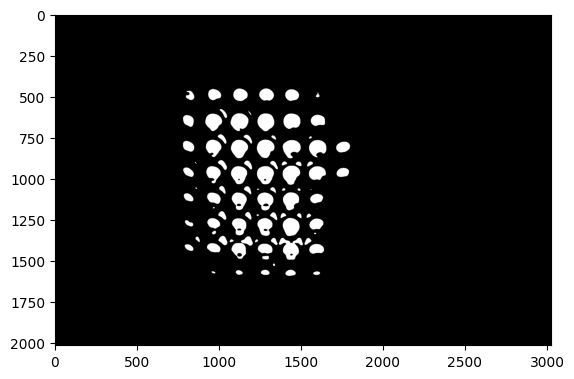

In [74]:
img = image_input("image_png/IMG_5379.png")
thresh = create_binary(img,60)

plt.imshow(thresh, cmap="gray")

### Task 3
- Write an algorithm which counts the number of bins. First approach could be a "sliding window" algorithm, i.e a loop sliding over the image and counting regions with substantial white content. There may also be nice segmentation tools out "there" already. You may google. [about 4 hours][max 3 points]

In [66]:
img = thresh
def bin_counting(image, window = 200, step = 100, threshold_A = 23000):
    img = image
    # Define the sliding window parameters
    window_size = window  # Size of the sliding window
    step_size = step   # Step size for moving the window

    # Initialize the counter
    counter = 0

    # Define the region above which to count white pixels
    threshold = threshold_A  # Threshold

    # Iterate over the image with the sliding window
    for y in range(0, img.shape[0], step_size):
        for x in range(0, img.shape[1], step_size):
            # Extract the current window
            window = img[y:y+window_size, x:x+window_size]
            
            # Count the number of white pixels in the window
            white_pixels = np.sum(window == 255)
            # Update the counter if the window is above the specified region
            if white_pixels >= threshold:
                counter += 1

    # Output the result
    return counter

print("estimated bins:" + str(bin_counting(thresh)))

estimated bins:49


### Task 4
- Write an algorithm which does the latter task on all images. As the images are quite different, this is a large task which goes beyond the time budget of this exercise, however, you can give it a try. If it works out for a couple of images, that is already good. [from 4 to 50 hours][max 3.5 points]

In [76]:
img_png_path = "image_png"
for file in os.listdir(img_png_path):
    image = image_input(img_png_path+"/"+file)
    img_by = create_binary(image)
    counter = bin_counting(img_by)
    print("estimated bins for " + file +":" + str(counter))


estimated bins for IMG_5379.png:49
estimated bins for IMG_5380.png:0
estimated bins for IMG_5381.png:12
estimated bins for IMG_5382.png:19
estimated bins for IMG_5383.png:0
estimated bins for IMG_5384.png:14
estimated bins for IMG_5385.png:0
estimated bins for IMG_5386.png:0
estimated bins for IMG_5387.png:0
estimated bins for IMG_5388.png:0
estimated bins for IMG_5389.png:3
estimated bins for IMG_5390.png:0
estimated bins for IMG_5391.png:0
estimated bins for IMG_5392.png:0
estimated bins for IMG_5393.png:0
